# Fighting Overfitting by Regularization & Dropout

> Reference: f.Chollet's deep learning with python

In [6]:
import numpy as np
import pandas as pd

import keras
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]

In [7]:
keras.__version__

'2.2.0'

In [8]:
tf.__version__

'1.12.0'

### IMDB Data Preparation
> Movie Review

In [9]:
# IMDB data loading
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [13]:
print("train data: ", train_data.shape); 
print("train labels: ", train_labels.shape)

train data:  (25000,)
train labels:  (25000,)


In [18]:
train_data[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [20]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [21]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [121]:
# vectorize train and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [122]:
# vectorize train and test labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [56]:
x_train[:3]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [57]:
x_train[0][:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [58]:
x_train.shape

(25000, 10000)

In [59]:
y_train[:3]

array([1., 0., 0.], dtype=float32)

In [61]:
y_train.shape

(25000,)

### Reducing the network's size

In [69]:
from keras import models
from keras import layers

#------
# build a bigger model
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(16, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

# compile a bigger model
bigger_model.compile(optimizer='rmsprop', 
                     loss='binary_crossentropy', 
                     metrics=['acc'])

#------
# build a smaller model
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

# compile a smaller model
smaller_model.compile(optimizer='rmsprop', 
                      loss='binary_crossentropy', 
                      metrics=['acc'])

In [70]:
# bigger model
bigger_hist = bigger_model.fit(x_train, y_train, 
                              epochs=20, 
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.4383 - acc: 0.8237 - val_loss: 0.3420 - val_acc: 0.8686
Epoch 2/20
25000/25000 [==============================] - 2s 88us/step - loss: 0.2526 - acc: 0.9097 - val_loss: 0.2975 - val_acc: 0.8804
Epoch 3/20
25000/25000 [==============================] - 2s 89us/step - loss: 0.1950 - acc: 0.9295 - val_loss: 0.2840 - val_acc: 0.8864
Epoch 4/20
25000/25000 [==============================] - 2s 89us/step - loss: 0.1636 - acc: 0.9431 - val_loss: 0.2964 - val_acc: 0.8827
Epoch 5/20
25000/25000 [==============================] - 2s 89us/step - loss: 0.1389 - acc: 0.9523 - val_loss: 0.3440 - val_acc: 0.8689
Epoch 6/20
25000/25000 [==============================] - 2s 88us/step - loss: 0.1207 - acc: 0.9582 - val_loss: 0.3377 - val_acc: 0.8761
Epoch 7/20
25000/25000 [==============================] - 2s 88us/step - loss: 0.1040 - acc: 0.9652 - val_loss: 0.3634 - val_ac

In [71]:
smaller_hist = smaller_model.fit(x_train, y_train, 
                                epochs=20, 
                                batch_size=512, 
                                validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.6168 - acc: 0.7338 - val_loss: 0.5489 - val_acc: 0.8329
Epoch 2/20
25000/25000 [==============================] - 2s 97us/step - loss: 0.4709 - acc: 0.8698 - val_loss: 0.4333 - val_acc: 0.8688
Epoch 3/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.3611 - acc: 0.8936 - val_loss: 0.3576 - val_acc: 0.8793
Epoch 4/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.2896 - acc: 0.9081 - val_loss: 0.3138 - val_acc: 0.8864
Epoch 5/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.2434 - acc: 0.9193 - val_loss: 0.2947 - val_acc: 0.8859
Epoch 6/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.2124 - acc: 0.9279 - val_loss: 0.2800 - val_acc: 0.8907
Epoch 7/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.1898 - acc: 0.9343 - val_loss: 0.2774 - val_ac

In [72]:
epochs = range(1, 21)
bigger_val_loss = bigger_hist.history['val_loss']
smaller_val_loss = smaller_hist.history['val_loss']

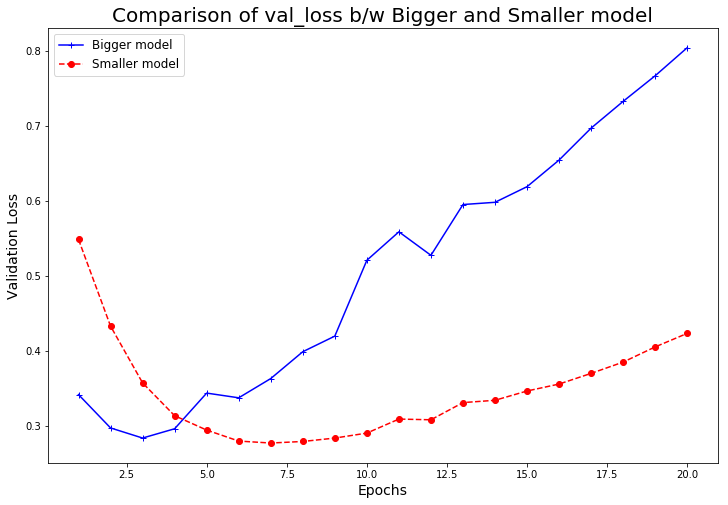

In [87]:
plt.clf()
plt.plot(epochs, bigger_val_loss, 'b+', label='Bigger model', linestyle='solid')
plt.plot(epochs, smaller_val_loss, 'ro', label='Smaller model', linestyle='dashed')
plt.title('Comparison of val_loss b/w Bigger and Smaller model', fontsize=20)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

In [74]:
# more bigger model
more_bigger_model = models.Sequential()
more_bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
more_bigger_model.add(layers.Dense(512, activation='relu'))
more_bigger_model.add(layers.Dense(1, activation='sigmoid'))

more_bigger_model.compile(optimizer='rmsprop', 
                         loss='binary_crossentropy', 
                         metrics=['acc'])

In [76]:
more_bigger_model_hist = more_bigger_model.fit(x_train, y_train, 
                                              epochs=20, 
                                              batch_size=512, 
                                              validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 9s 371us/step - loss: 0.4619 - acc: 0.7932 - val_loss: 0.3264 - val_acc: 0.8637
Epoch 2/20
25000/25000 [==============================] - 9s 347us/step - loss: 0.2221 - acc: 0.9110 - val_loss: 0.3198 - val_acc: 0.8675
Epoch 3/20
25000/25000 [==============================] - 9s 344us/step - loss: 0.1378 - acc: 0.9498 - val_loss: 0.3108 - val_acc: 0.8856
Epoch 4/20
25000/25000 [==============================] - 8s 337us/step - loss: 0.0591 - acc: 0.9820 - val_loss: 0.4342 - val_acc: 0.8756
Epoch 5/20
25000/25000 [==============================] - 9s 341us/step - loss: 0.0788 - acc: 0.9856 - val_loss: 0.4561 - val_acc: 0.8795
Epoch 6/20
25000/25000 [==============================] - 8s 336us/step - loss: 0.0021 - acc: 0.9998 - val_loss: 0.8734 - val_acc: 0.8468
Epoch 7/20
25000/25000 [==============================] - 9s 355us/step - loss: 0.0863 - acc: 0.9884 - val_loss: 0.7626 - 

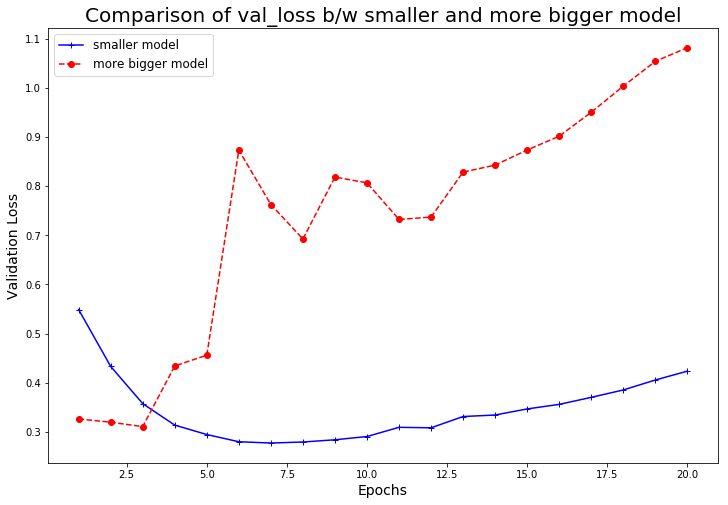

In [86]:
more_bigger_val_loss = more_bigger_model_hist.history['val_loss']

plt.clf()
plt.plot(epochs, smaller_val_loss, 'b+', label='smaller model', linestyle='solid')
plt.plot(epochs, more_bigger_val_loss, 'ro', label='more bigger model', linestyle='dashed')
plt.title('Comparison of val_loss b/w smaller and more bigger model', fontsize=20)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.legend(fontsize=12)

plt.show()

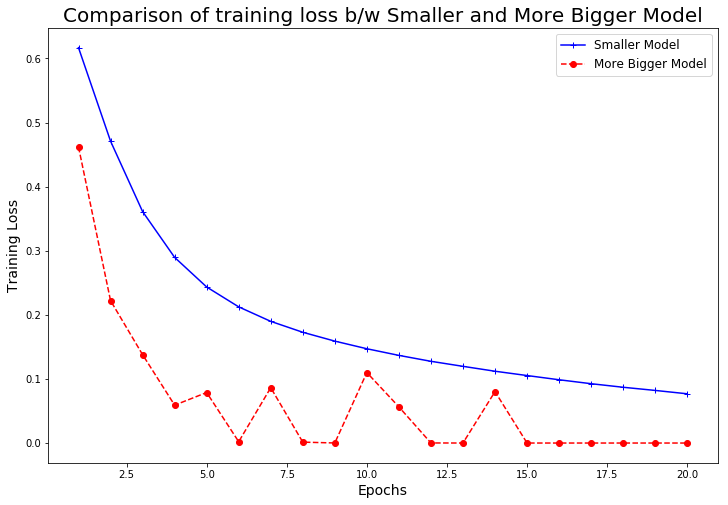

In [93]:
# Comparison of training_loss b/w smaller and more bigger model
# The more capacity the network has, the quicker it will model the training data, resulting in overfitting
smaller_train_loss = smaller_hist.history['loss']
more_bigger_train_loss = more_bigger_model_hist.history['loss']

plt.clf()
plt.plot(epochs, smaller_train_loss, 'b+', linestyle='solid', label='Smaller Model')
plt.plot(epochs, more_bigger_train_loss, 'ro', linestyle='dashed', label='More Bigger Model')
plt.title('Comparison of training loss b/w Smaller and More Bigger Model', fontsize=20)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Training Loss', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.show()

### Adding Weight Regularization

> Simpler models are less likely to overfit than complex ones.  
> To put constraints on the complexity of a network by forcing its weights to only take small values.  
> By using weight regularizer instances in Kerea

In [96]:
# L2 Regularization Penalty
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, 
                          kernel_regularizer=regularizers.l2(0.001), 
                          activation='relu', 
                          input_shape=(10000,)))
l2_model.add(layers.Dense(16, 
                         kernel_regularizer=regularizers.l2(0.001), 
                         activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [97]:
l2_model.compile(optimizer='rmsprop', 
                loss='binary_crossentropy', 
                metrics=['acc'])

In [99]:
l2_model_hist = l2_model.fit(x_train, y_train,
                            epochs=20, 
                            batch_size=512, 
                            validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.5257 - acc: 0.8148 - val_loss: 0.4175 - val_acc: 0.8751
Epoch 2/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.3410 - acc: 0.9029 - val_loss: 0.3557 - val_acc: 0.8818
Epoch 3/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.2879 - acc: 0.9167 - val_loss: 0.3404 - val_acc: 0.8857
Epoch 4/20
25000/25000 [==============================] - 2s 97us/step - loss: 0.2657 - acc: 0.9239 - val_loss: 0.3360 - val_acc: 0.8864
Epoch 5/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.2495 - acc: 0.9312 - val_loss: 0.3582 - val_acc: 0.8770
Epoch 6/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.2421 - acc: 0.9322 - val_loss: 0.3509 - val_acc: 0.8833
Epoch 7/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.2347 - acc: 0.9358 - val_loss: 0.3539 - val_ac

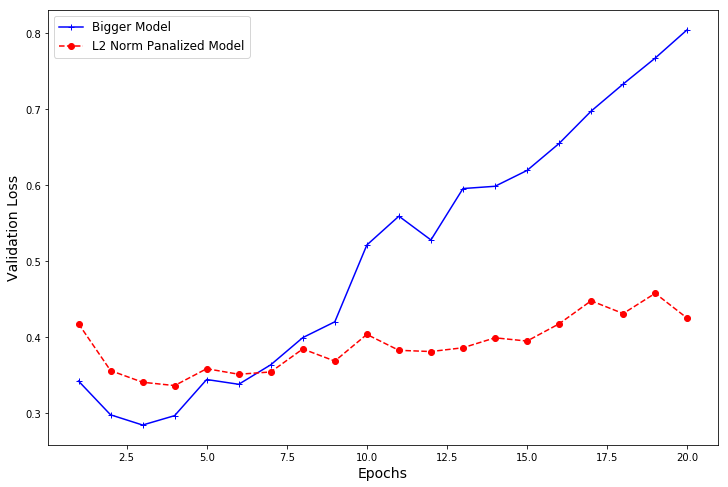

In [102]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.clf()
plt.plot(epochs, bigger_val_loss, 'b+', linestyle='solid', label='Bigger Model')
plt.plot(epochs, l2_model_val_loss, 'ro', linestyle='dashed', label='L2 Norm Panalized Model')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

### Adding Dropout
> Randomly setting to zero a number of output features of the layer during training. 

In [104]:
# adding dropout
dropout_model = models.Sequential()

dropout_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(16, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(1, activation='sigmoid'))

dropout_model.compile(optimizer='rmsprop', 
                     loss='binary_crossentropy', 
                     metrics=['acc'])

In [125]:
dropout_model_hist = dropout_model.fit(x_train, y_train, 
                                      epochs=20, 
                                      batch_size=512, 
                                      validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 164us/step - loss: 0.1002 - acc: 0.9645 - val_loss: 0.5932 - val_acc: 0.8742
Epoch 2/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.0939 - acc: 0.9659 - val_loss: 0.6150 - val_acc: 0.8729
Epoch 3/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.1023 - acc: 0.9638 - val_loss: 0.6152 - val_acc: 0.8723
Epoch 4/20
25000/25000 [==============================] - 2s 89us/step - loss: 0.0976 - acc: 0.9652 - val_loss: 0.6319 - val_acc: 0.8722
Epoch 5/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.0982 - acc: 0.9648 - val_loss: 0.6238 - val_acc: 0.8712
Epoch 6/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.0993 - acc: 0.9645 - val_loss: 0.6433 - val_acc: 0.8723
Epoch 7/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.0989 - acc: 0.9644 - val_loss: 0.6435 - val_ac

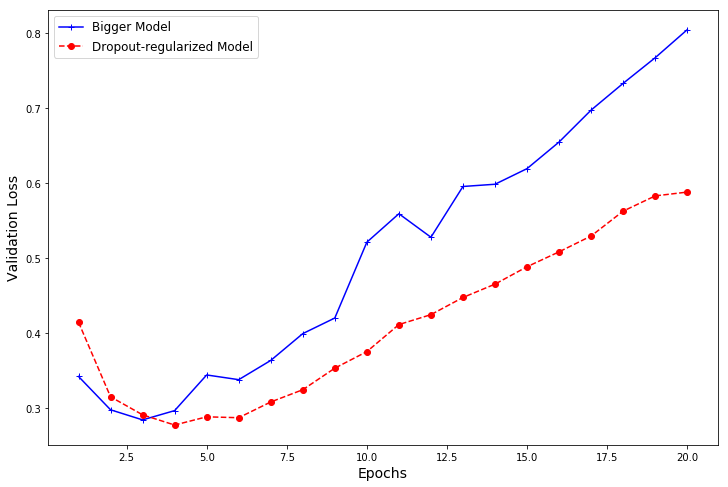

In [108]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

plt.clf()
plt.plot(epochs, bigger_val_loss, 'b+', linestyle='solid', label='Bigger Model')
plt.plot(epochs, dropout_model_val_loss, 'ro', linestyle='dashed', label='Dropout-regularized Model')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.show()

### Adding Weight Regularization & Dropout altogether

In [145]:
reg_dropout = models.Sequential()
reg_dropout.add(layers.Dense(16, 
                             kernel_regularizer=regularizers.l2(0.0005), 
                             activation='relu', input_shape=(10000,)))
reg_dropout.add(layers.Dropout(0.3))
reg_dropout.add(layers.Dense(16, 
                             kernel_regularizer=regularizers.l2(0.0005), 
                             activation='relu'))
reg_dropout.add(layers.Dropout(0.3))
reg_dropout.add(layers.Dense(1, activation='sigmoid'))

reg_dropout.compile(optimizer='rmsprop', 
                    loss='binary_crossentropy', 
                    metrics=['acc'])

In [146]:
reg_dropout_hist = reg_dropout.fit(x_train, y_train, 
                                  epochs=20, 
                                  batch_size=512, 
                                  validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.5531 - acc: 0.7467 - val_loss: 0.4216 - val_acc: 0.8565
Epoch 2/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.3802 - acc: 0.8680 - val_loss: 0.3231 - val_acc: 0.8877
Epoch 3/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.3052 - acc: 0.9036 - val_loss: 0.3059 - val_acc: 0.8898
Epoch 4/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.2650 - acc: 0.9196 - val_loss: 0.3065 - val_acc: 0.8884
Epoch 5/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.2408 - acc: 0.9296 - val_loss: 0.3147 - val_acc: 0.8861
Epoch 6/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.2190 - acc: 0.9393 - val_loss: 0.3471 - val_acc: 0.8786
Epoch 7/20
25000/25000 [==============================] - 2s 89us/step - loss: 0.2027 - acc: 0.9445 - val_loss: 0.3960 - val_ac

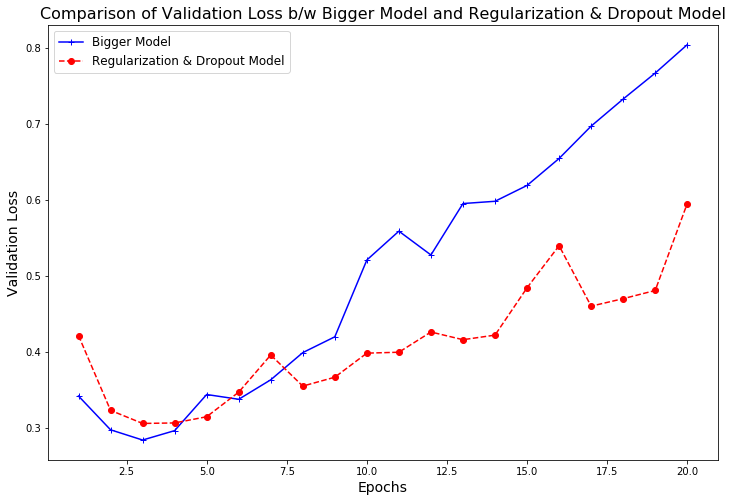

In [148]:
reg_dropout_val_loss = reg_dropout_hist.history['val_loss']

plt.clf()
plt.plot(epochs, bigger_val_loss, 'b+', linestyle='solid', label='Bigger Model')
plt.plot(epochs, reg_dropout_val_loss, 'ro', linestyle='dashed', label='Regularization & Dropout Model')
plt.title('Comparison of Validation Loss b/w Bigger Model and Regularization & Dropout Model', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.show()